# Simulated Annealing 

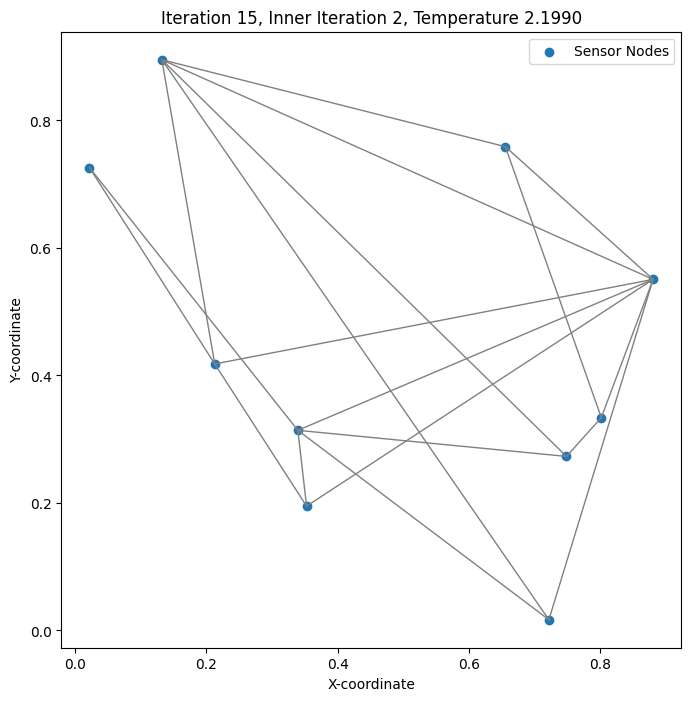

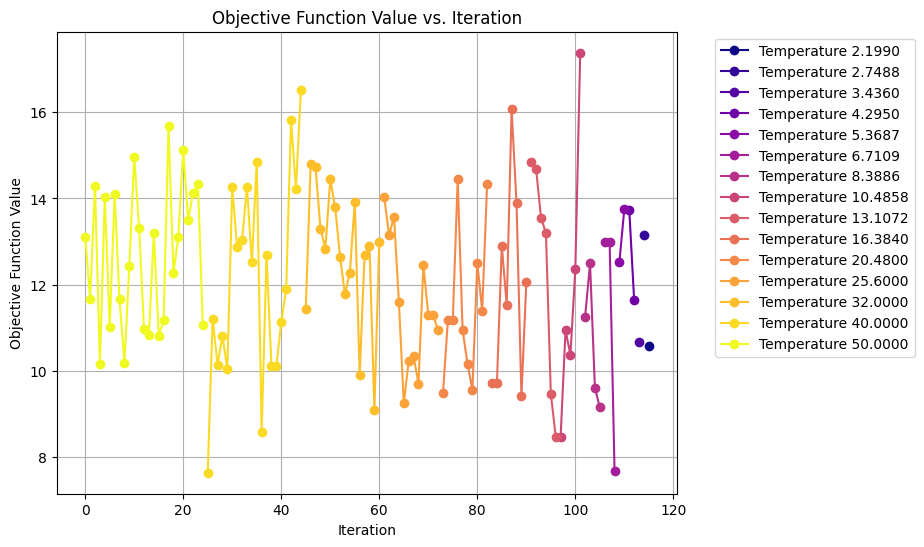

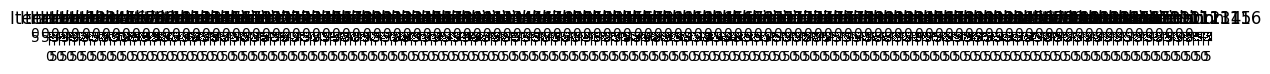

In [1]:
#SA without energy loss

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Function to calculate the Euclidean distance between two points (nodes)
def distance(node1, node2):
    return np.sqrt(np.sum((node1 - node2)**2))

# Function to evaluate the objective function value based on the node positions
def evaluate_objective_function(nodes, connectivity_matrix):
    total_distance = 0
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            if connectivity_matrix[i, j] == 1:
                total_distance += distance(nodes[i], nodes[j])
    return total_distance

# Function to visualize the current solution (node positions and connections)
def visualize_solution(nodes, connectivity_matrix, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(nodes[:, 0], nodes[:, 1], marker='o', label='Sensor Nodes')

    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            if connectivity_matrix[i, j] == 1:
                plt.plot([nodes[i, 0], nodes[j, 0]], [nodes[i, 1], nodes[j, 1]], color='gray', linestyle='-', linewidth=1)

    plt.title(title)
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend()
    plt.show()

# Plot Objective Function Value vs. Iteration
def plot_objective_function_values(objective_values, temperatures):
    plt.figure(figsize=(8, 6))

    # Get unique temperatures and corresponding colors
    unique_temperatures = sorted(set(temperatures))
    color_cycle = plt.cm.plasma(np.linspace(0, 1, len(unique_temperatures)))

    for temperature, color in zip(unique_temperatures, color_cycle):
        indices = [i for i, temp in enumerate(temperatures) if temp == temperature]
        plt.plot(indices, [objective_values[i] for i in indices], marker='o', linestyle='-', color=color, label=f'Temperature {temperature:.4f}')

    plt.title('Objective Function Value vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend outside the plot
    plt.grid(True)
    plt.show()

# Visualize Connectivity Matrix Evolution
def visualize_connectivity_matrix_evolution(connectivity_matrices):
    num_iterations = len(connectivity_matrices)
    fig, axs = plt.subplots(1, num_iterations, figsize=(15, 5))

    for i in range(num_iterations):
        axs[i].imshow(connectivity_matrices[i], cmap='binary', interpolation='none')
        axs[i].set_title(f'Iteration {i + 1}')
        axs[i].grid(False)

    plt.show()

# Simulated Annealing algorithm for Wireless Sensor Network with changing connections
def simulated_annealing_wsn_connections(initial_temperature, final_temperature, temperature_reduction_number, iterations_at_each_temperature, num_nodes, dimension):
    nodes = np.random.rand(num_nodes, dimension)
    connectivity_matrix = np.random.randint(2, size=(num_nodes, num_nodes))
    current_temperature = initial_temperature
    n = 1

    # Lists to store objective function values and connectivity matrices
    objective_values = []
    connectivity_matrices = []
    temperatures = []

    while current_temperature >= final_temperature:
        k = 1

        # Adjusted inner iterations at each temperature
        while k <= min(iterations_at_each_temperature[-1], int(0.5 * current_temperature)):
            new_connectivity_matrix = np.random.randint(2, size=(num_nodes, num_nodes))

            current_objective_value = evaluate_objective_function(nodes, connectivity_matrix)
            new_objective_value = evaluate_objective_function(nodes, new_connectivity_matrix)

            delta_z = new_objective_value - current_objective_value
            if delta_z < 0 or np.random.rand() < np.exp(-delta_z / current_temperature):
                connectivity_matrix = new_connectivity_matrix

            # Store objective function value, connectivity matrix, and temperature for plotting
            objective_values.append(current_objective_value)
            connectivity_matrices.append(connectivity_matrix.copy())
            temperatures.append(current_temperature)

            if k == iterations_at_each_temperature[-1]:
                break
            else:
                k += 1

            clear_output(wait=True)
            title = f'Iteration {n}, Inner Iteration {k}, Temperature {current_temperature:.4f}'
            visualize_solution(nodes, connectivity_matrix, title)

        current_temperature *= temperature_reduction_number
        n += 1

    # Plot Objective Function Value vs. Iteration with temperature information
    plot_objective_function_values(objective_values, temperatures)

    # Visualize Connectivity Matrix Evolution
    visualize_connectivity_matrix_evolution(connectivity_matrices)

# Example usage of the Simulated Annealing algorithm for WSN with changing connections
initial_temperature = 50  # Adjusted initial temperature
final_temperature = 0.0052
temperature_reduction_number = 0.8
iterations_at_each_temperature = [30, 40, 50, 60, 70, 80, 90, 100]  # Adjusted iterations
num_nodes = 10
dimension = 2

simulated_annealing_wsn_connections(
    initial_temperature, final_temperature, temperature_reduction_number, iterations_at_each_temperature, num_nodes, dimension)
# This Python script implements a Simulated Annealing algorithm for optimizing a Wireless Sensor Network (WSN)
# The objective is to adjust the connectivity matrix to minimize the objective function value, representing the network's efficiency

# The algorithm uses random initial sensor nodes and connectivity matrices and iteratively explores new solutions
# It employs the Metropolis criterion to accept or reject changes based on the objective function value and temperature

# The code includes functions for calculating distances, evaluating objective function values, visualizing solutions, and plotting results

# The main function, simulated_annealing_wsn_connections, takes parameters such as initial and final temperatures,
# temperature reduction factor, and the number of iterations at each temperature

# The output consists of plots showing the Objective Function Value vs. Iteration, with different colors representing temperatures,
# and the evolution of connectivity matrices during the annealing process

# Example usage demonstrates the application of the algorithm with adjusted parameters for a WSN with 10 nodes in 2D space